In [126]:
import numpy as np                  # NumPy
from keras.models import Sequential # 이하 Keras 모듈들입니다.
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
from resizeimage import resizeimage
import cv2
import tensorflow as tf
 

np.random.seed(123)                 # 랜덤시드를 지정하면, 재실행시에도 같은 랜덤값을 추출합니다(reproducibility)
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

In [127]:
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, pooling
from keras.utils import np_utils

In [128]:
from keras.datasets import mnist

In [129]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

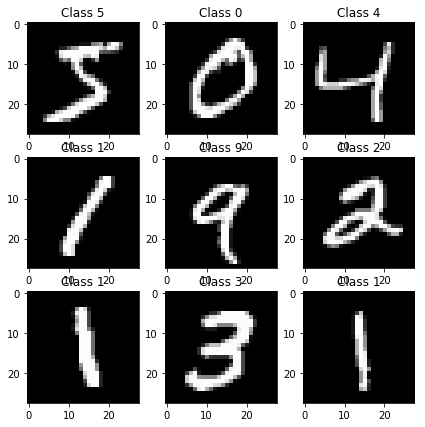

In [130]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [131]:
 print(X_train.shape)

(60000, 28, 28)


In [132]:
print(X_test.shape)

(10000, 28, 28)


In [133]:
print(y_train.shape)

(60000,)


In [134]:
 print(y_test.shape)

(10000,)


In [135]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)

In [136]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [137]:
print(X_train.shape)

(60000, 28, 28, 1)


In [138]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [139]:
>>> print (y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [140]:
>>> Y_train = np_utils.to_categorical(y_train, 10)
>>> Y_test = np_utils.to_categorical(y_test, 10)
>>> print (Y_train[:10])

[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


In [141]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28, 1)))
print(model.output_shape)

(None, 26, 26, 32)


In [142]:
>>> model.add(Conv2D(32, (3, 3), activation='relu'))
>>> model.add(pooling.MaxPooling2D(pool_size=(2,2)))
>>> model.add(Dropout(0.25))
>>> print(model.output_shape)

(None, 12, 12, 32)


In [143]:
>>> model.add(Flatten())
>>> model.add(Dense(128, activation='relu'))
>>> model.add(Dropout(0.5))
>>> model.add(Dense(10, activation='softmax'))
>>> print(model.output_shape)

(None, 10)


In [144]:
>>> model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [145]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.2107 - acc: 0.9353
Epoch 2/10
60000/60000 [==============================] - 12s 199us/step - loss: 0.0888 - acc: 0.9736
Epoch 3/10
60000/60000 [==============================] - 12s 199us/step - loss: 0.0660 - acc: 0.9803
Epoch 4/10
60000/60000 [==============================] - 12s 205us/step - loss: 0.0572 - acc: 0.9829
Epoch 5/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.0485 - acc: 0.9849
Epoch 6/10
60000/60000 [==============================] - 12s 206us/step - loss: 0.0428 - acc: 0.9869
Epoch 7/10
60000/60000 [==============================] - 12s 199us/step - loss: 0.0368 - acc: 0.9882
Epoch 8/10
60000/60000 [==============================] - 12s 199us/step - loss: 0.0358 - acc: 0.9886
Epoch 9/10
60000/60000 [==============================] - 12s 200us/step - loss: 0.0319 - acc: 0.9897
Epoch 10/10
60000/60000 [==============================] - 12s 200us/step - loss: 

In [148]:
>>> score = model.evaluate(X_test, Y_test, verbose=0)
>>> print(model.metrics_names)

['loss', 'acc']


In [149]:
>>> print(score)

[0.025307714027580367, 0.99250000000000005]


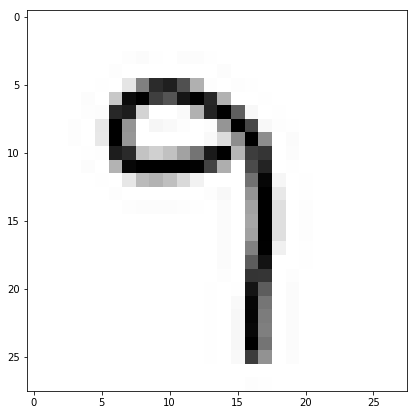

In [222]:
with open('9.png') as f:
    with Image.open(f)as image:
        cover = resizeimage.resize_cover(image, [28, 28])
        cover.save('img.png', 'png')
        
img = mpimg.imread('img.png')
imgplot1 = plt.imshow(img)



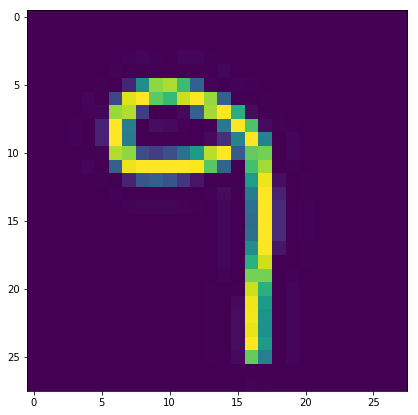

In [223]:
w,h = img.shape[0],img.shape[1]
imgChanged = np.zeros((img.shape[0],img.shape[1]))
for x in range(0,img.shape[0]):
    for y in range(0,img.shape[1]):
         imgChanged[x][y] = img[x][y][3];

#for x in range(0,img.shape[0]):
#     for y in range(0,img.shape[1]):
#         if img[x][y][3] >0.1 :
#             imgChanged[x][y] = 1;
            
imgplot1 = plt.imshow(imgChanged)

In [224]:
print( model.predict_classes(imgChanged.reshape((1, 28, 28,1))))

[7]
